In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Number of waypoints = 230


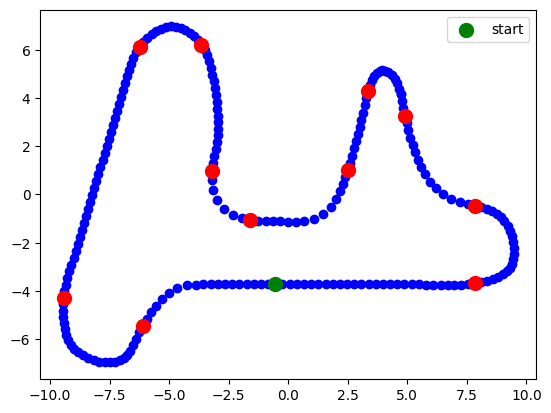

In [ ]:

# Get waypoints from numpy file
waypoints = np.load("penbay_open.npy")
print("Number of waypoints = " + str(waypoints.shape[0]))

def plot_waypoint(waypoint: int, color: str='red', label: str=None):
  plt.scatter(waypoints[waypoint][2], waypoints[waypoint][3], color=color, s=100, label=label)


# Plot waypoints
for i, point in enumerate(waypoints):
    waypoint = (point[2], point[3])
    plt.scatter(waypoint[0], waypoint[1], color='blue')

# Find waypoint ranges
plot_waypoint(0, color='green', label='start')
plot_waypoint(28)
plot_waypoint(50)
plot_waypoint(65)
plot_waypoint(82)
plot_waypoint(93)
plot_waypoint(108)
plot_waypoint(115)
plot_waypoint(134)
plot_waypoint(148)
plot_waypoint(185)
plot_waypoint(210)

plt.legend()
plt.show()

In [ ]:
# Define the ranges
fast = [(0, 27), (82, 92), (115, 133), (148, 184)]
medium = [(50, 64), (93, 107), (211, 229)]
slow = [(28, 49), (65, 81), (108, 114), (134, 147), (185, 210)]

data = []

for point in range(waypoints.shape[0]):
    label = None

    for range_start, range_end in fast:
        if range_start <= point <= range_end:
            label = 'fast'
            break

    if label is None:
        for range_start, range_end in medium:
            if range_start <= point <= range_end:
                label = 'medium'
                break

    if label is None:
        for range_start, range_end in slow:
            if range_start <= point <= range_end:
                label = 'slow'
                break

    data.append((point, label))

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Waypoint', 'Speed'])
df.set_index('Waypoint', inplace=True)

df

,Speed
Waypoint,
0,fast
1,fast
2,fast
3,fast
4,fast
...,...
225,medium
226,medium
227,medium


In [ ]:
df.loc[3]['Speed']

'fast'

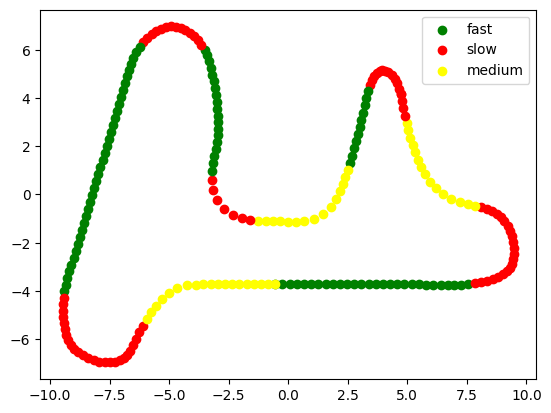

In [ ]:
# Plot track with labels
for i in range(waypoints.shape[0]):
  speed = df.loc[i]['Speed']

  color = "grey"
  if speed == 'fast':
    color = 'green'
  elif speed == 'medium':
    color = 'yellow'
  elif speed == 'slow':
    color = 'red'
  plt.scatter(waypoints[i][2], waypoints[i][3], color=color, label=speed)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


In [ ]:
# Get the waypoints list to be pasted in the reward function
from pprint import pprint

waypoints_list = {
    'fast': [],
    'medium': [],
    'slow': []
}


for i in range(waypoints.shape[0]):
  speed = df.loc[i]['Speed']
  waypoints_list[speed].append(i)


print(f'fast: {waypoints_list["fast"]}')
print(f'medium: {waypoints_list["medium"]}')
print(f'slow: {waypoints_list["slow"]}')

fast: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184]
medium: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229]
slow: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 108, 109, 110, 111, 112, 113, 114, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 19